In [10]:
! pip install numpy pandas matplotlib seaborn sklearn

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## Part (A) Feature Selection

In [13]:
#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")

#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
X_selected = [False for i in range(df_X_header.shape[1])]
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    
    elif (df_X_header.iloc[1,ic] == "mean"):
        X_selected[ic] = True

#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

#combine header and the data together
X_train.columns = X_header


In [18]:

# print(Y_train.shape)

X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,X_selected]
print(X_train.shape)
print(X_id.shape)
print(X_feat.shape)
print(sum(X_selected))

(16760, 7489)
(16760,)
(16760, 2496)
2496


,alanine aminotransferase&mean&0,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,...,white blood cell count urine&mean&14,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065309,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,...,-0.000301,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448
std,0.425832,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,...,0.339302,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246


In [19]:
#understand the structure of features
#the number retured indicates how many "elements" included in feature set
def feature_dim(df_col = pd.read_csv("X_train.csv",dtype = str, nrows = 0)):
    count = 0
    word = []
    for i in df_col.columns:
        if '.' in i:
            temp = i[:i.find('.')]
        else:
            temp = i
        if temp not in word:
            word.append(temp)
            count += 1
    return count
print(feature_dim())

105


In [20]:
corr = X_feat.corr()
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2496 entries, alanine aminotransferase&mean&0 to white blood cell count urine&mean&23
Columns: 2496 entries, alanine aminotransferase&mean&0 to white blood cell count urine&mean&23
dtypes: float64(2496)
memory usage: 47.6+ MB


In [63]:
def featureSelectByCorr(corr):
    threshold = 0.9
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("n_features_selected by Corr:",sum(cols))
    return cols

cols_corr = featureSelectByCorr(corr)

n_features_selected by Corr: 349


In [65]:
X_feat_corr = X_feat[X_feat.columns[cols_corr]]
print(X_feat_corr.shape)

(16760, 349)


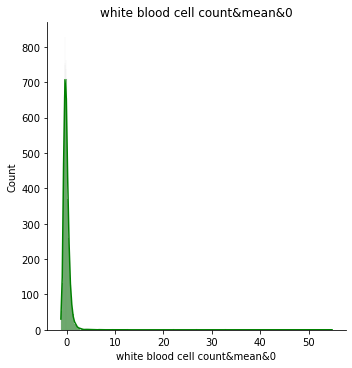

In [73]:
#visualizing the features to check its distribution to determine whether normalization or standardization is more suitable for feature scaling
check_ID = 347#range(0,X_feat_corr.shape[1] = 2423)


sns.displot(X_feat_corr.iloc[:,check_ID], color = 'g', kde  = True).set(title = X_feat_corr.columns[check_ID])

plt.show()

In [71]:
#Standardlization of features
X_feat_corr_std = X_feat_corr.copy()
for i in range(X_feat_corr_std.shape[0]):
    X_feat_corr_std[i] = 